In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import re

In [18]:
#run a nested for loop to get the file names
#write a function to load and display the FFT plot for that specific trap voltage configuration
#could the double peak be detected automatically without manually inspecting every datapoint?

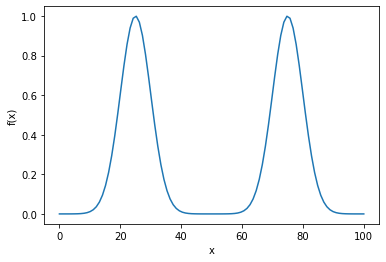

In [19]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x  = np.linspace(0, 100, 100)
y1 = gaussian(x[:50], 25, 5)
y2 = gaussian(x[50:], 75, 5)
y  = np.append(y1, y2)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)');

In [33]:
folder = 'Trap Scan Weekend'
files = [f for f in os.listdir(folder)]
ring_v, tr, asym = [], [], []
for f in files:
    volt, ratio, a = f.split('_')
    ring_v.append(float(volt))
    tr.append(float(ratio))
    asym.append(float(re.findall(r'(.*).csv', a)[0]))

print(len(ring_v), len(tr), len(asym))

6000 6000 6000


In [ ]:
x = np.linspace(0,4,1e3)
data = .2*np.sin(10*x)+ np.exp(-np.abs(2-x)**2)

# that's the line, you need:
#a = np.diff(np.sign(diff(data))).nonzero()[0] + 1 # local min+max
b = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1 # local min
#c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max


# graphical output...
from pylab import *
plot(x,data)
plot(x[b], data[b], "o", label="min")
#plot(x[c], data[c], "o", label="max")
legend()
show()